<h1 style="font-family:verdana;"> <center>📚 🇦🇷 Arabic Handwritten Alphabet Classification using CNN 📚</center> </h1>
<p><center style="color:#159364; font-family:cursive;">Enjoy this notebook</center></p>
 
 ***

# 📚  Importing libraries and reading our data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
train = pd.read_csv('../input/ahcd1/arabic handwritten characters dataset csv/csvTrainImages 13440x1024.csv')
label = pd.read_csv('../input/ahcd1/Arabic Handwritten Characters Dataset CSV/csvTrainLabel 13440x1.csv')

# 🔎 Data Exploration

In [3]:
train.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.896,0.897,0.898,0.899,0.900,0.901,0.902,0.903,0.904,0.905
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label

,1
0,1
1,1
2,1
3,1
4,1
...,...
13434,28
13435,28
13436,28
13437,28


Labels are corresponding to the position of the letter in the alphabet , 1 means first letter in the alphabet - which is (أ) , 28 is the last (ي) and so on...

# 📊 Data Processing and Visualization

In [5]:
train = train/255.0

<p style="font-size:15px; font-family:verdana; line-height: 1.7em"> <I>This step is called Data normalization (Making our pixel values range from 0 to 1)</I></p>

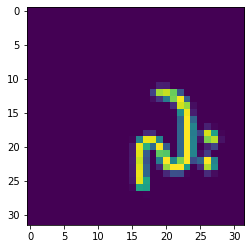

In [6]:
plt.imshow(train.loc[13434,:].to_numpy().reshape(32,32)) # each image contains 1024 pixles which translates to 32x32 

الصورة لحرف الياء 

In [7]:
label.loc[13434]

1    28
Name: 13434, dtype: int64

رقم 28 يعني حرف الياء

In [8]:
label.value_counts()

1 
15    480
2     480
27    480
26    480
25    480
24    480
23    480
22    480
21    480
20    480
19    480
18    480
17    480
16    480
28    480
14    480
13    480
12    480
11    480
10    480
9     480
8     480
7     480
6     480
5     480
4     480
3     480
1     479
dtype: int64

Our data is balanced 

# 🗃 Splitting and reshaping our data

In [9]:
#Let's first split our data for training and testing

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(train.values,label.values,test_size=.3,shuffle=True,random_state=2) 

*shuffling the data is important since our data is actually ordered by letters which won't help our model, otherwise our model might 
generalize and overfit, this is done using the shuffle argument,* `shuffle=True`

In [10]:
#Reshaping our variables to fit into our CNN model, 
x_train = x_train.reshape(-1,32,32,1)
x_test = x_test.reshape(-1,32,32,1)

This step is important, Conv2D layer expects an input with 4D shape: batch_shape + (rows, cols, channels) , channels is 1 meaning a grayscale image - 3 for RGB 

In [11]:
y_test = y_test.reshape(len(y_test),)

In [12]:
y_test

array([23, 10, 28, ...,  8,  3,  3])

# 📏 Creating our CNN model

In [13]:
from tensorflow import keras

In [14]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(32,32,1)),
    keras.layers.Conv2D(24,(3,3),activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(29,activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2022-10-10 14:02:38.297547: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.94):
      print("\nReached 94% accuracy so cancelling training!")
      self.model.stop_training=True
callbacks = myCallback()

Here we are telling the model to stop training when it reaches 94% accuracy

In [16]:
history = model.fit(x_train,y_train,epochs=40,callbacks=[callbacks],validation_data=(x_test,y_test))

2022-10-10 14:02:38.564039: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
294/294 [==============================] - 5s 15ms/step - loss: 2.1542 - accuracy: 0.3713 - val_loss: 1.3725 - val_accuracy: 0.6052
Epoch 2/40
294/294 [==============================] - 4s 15ms/step - loss: 1.2189 - accuracy: 0.6191 - val_loss: 0.9208 - val_accuracy: 0.7329
Epoch 3/40
294/294 [==============================] - 5s 18ms/step - loss: 0.8856 - accuracy: 0.7180 - val_loss: 0.7001 - val_accuracy: 0.7919
Epoch 4/40
294/294 [==============================] - 5s 15ms/step - loss: 0.7003 - accuracy: 0.7819 - val_loss: 0.5799 - val_accuracy: 0.8239
Epoch 5/40
294/294 [==============================] - 4s 15ms/step - loss: 0.5873 - accuracy: 0.8134 - val_loss: 0.4919 - val_accuracy: 0.8517
Epoch 6/40
294/294 [==============================] - 4s 15ms/step - loss: 0.5195 - accuracy: 0.8359 - val_loss: 0.4711 - val_accuracy: 0.8591
Epoch 7/40
294/294 [==============================] - 4s 15ms/step - loss: 0.4493 - accuracy: 0.8555 - val_loss: 0.4509 - val_accuracy: 0.8569

let's visualize our model's accuracy

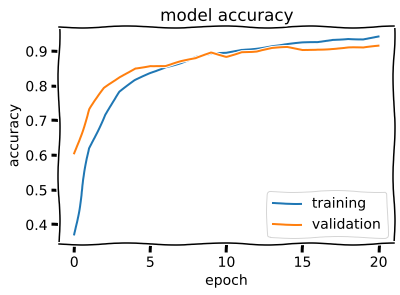

In [17]:
with plt.xkcd():
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()

In [18]:
pred = model.predict(x_test)

Since softmax activation function was used in the last layer it returns a probability for each class, we need to get the highest number in each prediction as it represents the image's predicted label

In [19]:
pred = [np.argmax(i) for i in pred]

# 📈 Visualizing Model predictions 

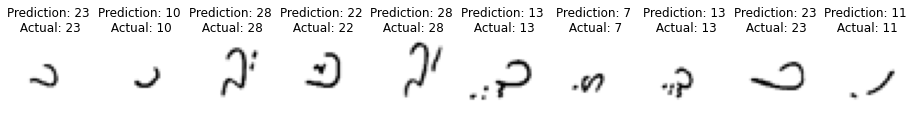

In [20]:
_,axes = plt.subplots(nrows=1,ncols=10 , figsize=(16,4))
for ax,image, actual, prediction in zip(axes,x_test,y_test,pred):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r)
    ax.set_title(f'Prediction: {prediction}\n Actual: {actual}')

The model's performance is good, we can still improve our performance, but let's leave it here for this time! 

<center style="font-family:cursive; font-size:18px; color:#159364;">💬 Would like to hear your comments/suggestions. Hope you find this notebook useful in anyway.</center>

***